In [115]:
from urllib.parse import urlencode, urlparse
import pandas as pd
import requests
import math
import datetime

%matplotlib inline

In [116]:
#получаем ссылку для получения токена
AUTHORIZE_URL = 'https://oauth.vk.com/authorize'
VERSION = '5.63'
APP_ID = 5854786

auth_data = {
    'client_id': APP_ID,
    'display': 'mobile',
    'response_type': 'token',
    'scope': 'friends, groups',
    'v': VERSION,
}

print('?'.join((AUTHORIZE_URL, urlencode(auth_data))))

https://oauth.vk.com/authorize?client_id=5854786&display=mobile&response_type=token&scope=friends%2C+groups&v=5.63


In [117]:
# Переходим по полученной ссылке и копируем ее в строку "token_url"
token_url = #в даннуя сроку 

o = urlparse(token_url)
fragments = dict((i.split('=') for i in o.fragment.split('&')))
ACCESS_TOKEN = fragments['access_token']

In [118]:
file_path = #вводим путь к сохраненному файлу напр. 'C:/Users/Anton/Desktop/python/net/vk-bot/top100.json'
top_group_selebrity = pd.read_json(file_path, encoding="utf-8" )
top_group_selebrity

,count,id,title
0,10,24770985,ФИТ | РГСУ
1,9,39683739,Официальная страница РГСУ
2,8,58593098,Подслушано в РГСУ
3,6,76353235,IST-2014
4,5,54530371,Библиотека программиста
5,5,82969684,Сессия ФИТиТБ
6,5,56106344,Палата №6
7,5,16108331,Программирование ITmozg:
8,5,31480508,Пикабу
9,4,59562476,Признания в РГСУ


In [119]:
info_about_group = {}
for top_group in top_group_selebrity['id'].head(5):
    params = {'access_token': ACCESS_TOKEN,
              'group_id' : top_group,
              'v': VERSION}
    
    response_follover_group = requests.get('https://api.vk.com/method/stats.get', params)



In [122]:
def parse_info_stat(top_group, follovers):
    info_about_person = {}
    sex = {}
    sexm = 0
    sexw = 0
    bdate = {}
    bdate_10 = 0
    bdate_17 = 0
    bdate_23 = 0
    bdate_35 = 0
    bdate_36 = 0
    for people in follovers:
        try:
            if(people['sex'] == 2):
                sexm += 1
            else:
                sexw += 1 
                
            try:
                dat_birthday = people['bdate'].split('.')
                delt_time = datetime.datetime.now() - datetime.datetime(int(dat_birthday[2]), int(dat_birthday[1]), int(dat_birthday[0]))                                                                                       
                years = math.floor(delt_time.days/365)

                if(years <= 10):
                    bdate_10 += 1
                elif(10 < years < 18):
                    bdate_17 += 1
                elif(18 <= years < 24):
                    bdate_23 += 1
                elif(24 <= years <36):
                    bdate_35 += 1
                elif(36 <= years):
                    bdate_36 += 1
            except IndexError:
                pass
            except ValueError:
                pass
            
        except KeyError:
            pass      
        
        
    sex = {'sexm': sexm, 'sexw': sexw}
    bdate = {'0-10': bdate_10, '11-17': bdate_17, '18-23': bdate_23, '24-35': bdate_35, '36-...': bdate_36}
    info_about_person = {'id' : top_group, 'sex': sex, 'bdate': bdate}
    return info_about_person
    

def get_add_info_about_group(group, count_step, follovers):
    offset=1000
    while(count_step>1):
        count_step = count_step - 1
        params = {'access_token': ACCESS_TOKEN,
                  'group_id' : group,
                  'fields' : 'sex, bdate',
                  'count' : 1000,
                  'offset' : offset,
                  'v': VERSION}

        response = requests.get('https://api.vk.com/method/groups.getMembers', params)
        offset += 1000
        try:
            follovers += response.json()['response']['items']
        except KeyError:
            count_step = count_step + 1
            offset -= 1000
    return follovers
        
        
def get_info_people_in_group(group):
    params = {'access_token': ACCESS_TOKEN,
              'group_id' : group,
              'fields' : 'sex, bdate',
              'v': VERSION}
    
    response = requests.get('https://api.vk.com/method/groups.getMembers', params)
    follovers = response.json()['response']['items']
    response_count = response.json()['response']['count']
    count_step = math.ceil(response_count/1000)
    if (count_step > 1):
        return get_add_info_about_group(group, count_step, follovers)
    return follovers

count_group = 0
info_about_group = {}
for top_group in top_group_selebrity['id'].head(5):
    count_group += 1
    follovers = get_info_people_in_group(top_group)
    info_about_group[count_group] = parse_info_stat(top_group, follovers)
    
info_about_group    

{1: {'bdate': {'0-10': 0, '11-17': 7, '18-23': 330, '24-35': 63, '36-...': 16},
  'id': 24770985,
  'sex': {'sexm': 624, 'sexw': 575}},
 2: {'bdate': {'0-10': 0,
   '11-17': 162,
   '18-23': 3134,
   '24-35': 1641,
   '36-...': 448},
  'id': 39683739,
  'sex': {'sexm': 4631, 'sexw': 11167}},
 3: {'bdate': {'0-10': 0,
   '11-17': 66,
   '18-23': 2310,
   '24-35': 622,
   '36-...': 173},
  'id': 58593098,
  'sex': {'sexm': 2964, 'sexw': 6085}},
 4: {'bdate': {'0-10': 0, '11-17': 0, '18-23': 7, '24-35': 1, '36-...': 1},
  'id': 76353235,
  'sex': {'sexm': 14, 'sexw': 7}},
 5: {'bdate': {'0-10': 0,
   '11-17': 4443,
   '18-23': 31926,
   '24-35': 29873,
   '36-...': 6172},
  'id': 54530371,
  'sex': {'sexm': 162479, 'sexw': 46252}}}

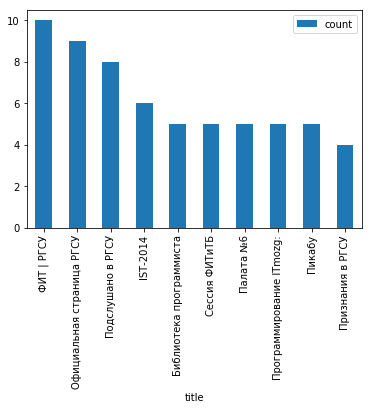

In [123]:
top_group_selebrity.head(10).plot.bar(y ='count', x = 'title')

24770985


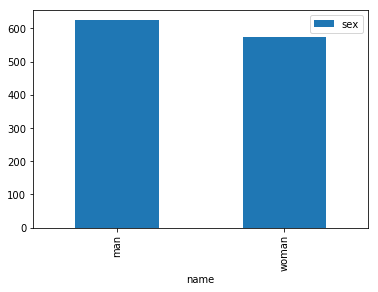

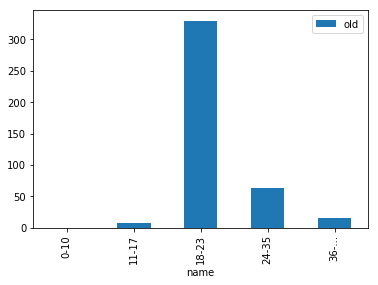

In [132]:
# выводим статистику по первой группе
new_group = info_about_group[1]

print(new_group['id'])
sex_group = []
sex_group.append({'sex': new_group['sex']['sexm'], 'name' : 'man'})
sex_group.append({'sex' : new_group['sex']['sexw'], 'name' : 'woman'})

pd.DataFrame(sex_group).plot.bar(x ='name', y = 'sex', )

old_group = []
for key, old_stat in new_group['bdate'].items():
    old_group.append({'old': old_stat, 'name' : key})
pd.DataFrame(old_group).plot.bar(x ='name', y = 'old')

39683739


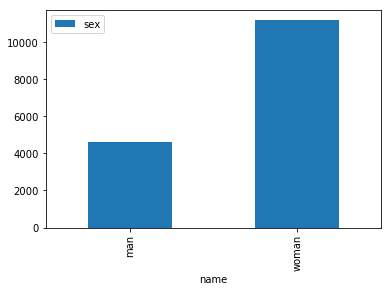

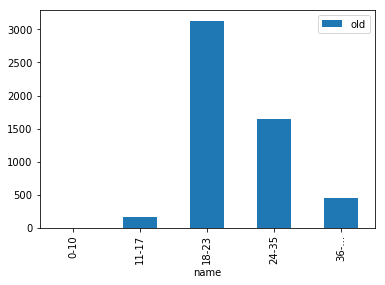

In [135]:
# выводим статистику по второй группе
new_group = info_about_group[2]

print(new_group['id'])
sex_group = []
sex_group.append({'sex': new_group['sex']['sexm'], 'name' : 'man'})
sex_group.append({'sex' : new_group['sex']['sexw'], 'name' : 'woman'})

pd.DataFrame(sex_group).plot.bar(x ='name', y = 'sex', )

old_group = []
for key, old_stat in new_group['bdate'].items():
    old_group.append({'old': old_stat, 'name' : key})
pd.DataFrame(old_group).plot.bar(x ='name', y = 'old')

58593098


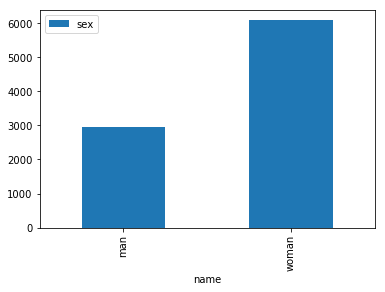

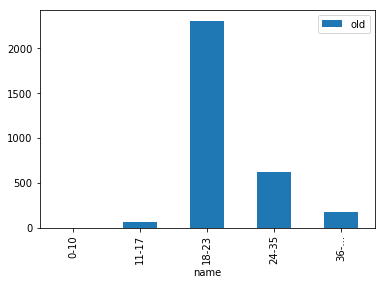

In [136]:
# выводим статистику по третьей группе
new_group = info_about_group[3]

print(new_group['id'])
sex_group = []
sex_group.append({'sex': new_group['sex']['sexm'], 'name' : 'man'})
sex_group.append({'sex' : new_group['sex']['sexw'], 'name' : 'woman'})

pd.DataFrame(sex_group).plot.bar(x ='name', y = 'sex', )

old_group = []
for key, old_stat in new_group['bdate'].items():
    old_group.append({'old': old_stat, 'name' : key})
pd.DataFrame(old_group).plot.bar(x ='name', y = 'old')

76353235


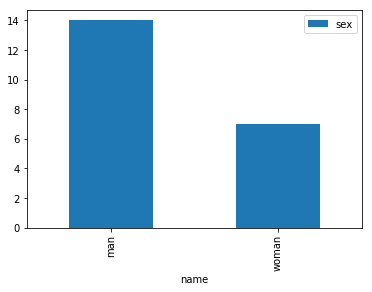

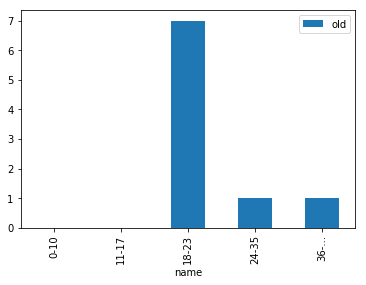

In [137]:
# выводим статистику по четвертой группе
new_group = info_about_group[4]

print(new_group['id'])
sex_group = []
sex_group.append({'sex': new_group['sex']['sexm'], 'name' : 'man'})
sex_group.append({'sex' : new_group['sex']['sexw'], 'name' : 'woman'})

pd.DataFrame(sex_group).plot.bar(x ='name', y = 'sex', )

old_group = []
for key, old_stat in new_group['bdate'].items():
    old_group.append({'old': old_stat, 'name' : key})
pd.DataFrame(old_group).plot.bar(x ='name', y = 'old')

54530371


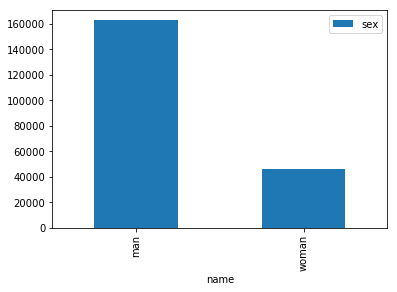

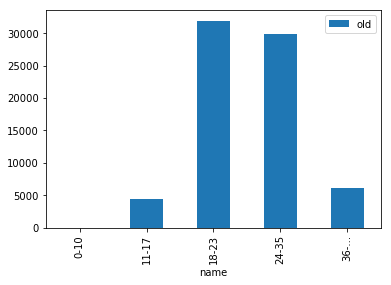

In [138]:
# выводим статистику по пятой группе
new_group = info_about_group[5]

print(new_group['id'])
sex_group = []
sex_group.append({'sex': new_group['sex']['sexm'], 'name' : 'man'})
sex_group.append({'sex' : new_group['sex']['sexw'], 'name' : 'woman'})

pd.DataFrame(sex_group).plot.bar(x ='name', y = 'sex', )

old_group = []
for key, old_stat in new_group['bdate'].items():
    old_group.append({'old': old_stat, 'name' : key})
pd.DataFrame(old_group).plot.bar(x ='name', y = 'old')